In [1]:
from __future__ import annotations
from dataclasses import dataclass,field
from typing import Callable, Dict, List, Optional, Set, Tuple,Union
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
#CWComplex
#Cells = int -> [Cell] 
#dimension -> list of cells of that dimension
class CWcomplex():
  def __init__(self,layers:List[List[Cell]]):
    self.layers=layers

In [3]:
#Cell:
# dimension: int
# boundary: [Cell] 
# atomization: Cell | None
class Cell():
  def __init__(self,dimension:int,boundary:Tuple[Cell,...],atomization:Union[Cell,None]):
   self.boundary=tuple(boundary)
   self.dimension=dimension
   self.atomization=atomization

In [4]:
def transfrom_CWc_to_npartite(c: CWcomplex):
  #for Li-san to implement
  result = nx.MultiDiGraph() 
  for layer in c.layers:
    layer_dimension=layer[0].dimension
    for cell in layer:
      result.add_node(cell,dimension=cell.dimension)
      if layer_dimension==0:
        continue
      for bnd in cell.boundary:
          result.add_edge(cell,bnd)#connect layer i to its boundary
      if layer_dimension>=2 and cell.atomization is not None:#check atomization
            result.add_edge(cell,cell.atomization)
  return result

In [5]:
# DSU Cell
cell_0_0 = Cell(0, [], None)
cell_0_1 = Cell(0, [], None)
cell_0_2 = Cell(0, [], None)

cell_1_0 = Cell(1, [cell_0_0, cell_0_1], None)
cell_1_1 = Cell(1, [cell_0_1, cell_0_2], None)
cell_1_2 = Cell(1, [cell_0_2, cell_0_0], None)
cell_2_0 = Cell(2, [cell_1_0, cell_1_1], None)
cell_3_0 = Cell(3, [cell_2_0],cell_0_0)

In [6]:
# DSU CWcomplex
c = CWcomplex([[cell_0_0, cell_0_1, cell_0_2],[cell_1_0, cell_1_1, cell_1_2],[cell_2_0],[cell_3_0]])
nc = transfrom_CWc_to_npartite(c)

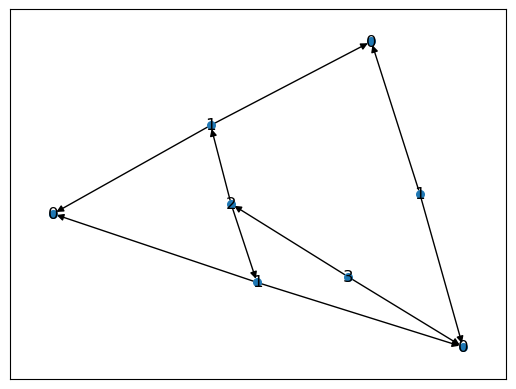

In [8]:
dimension = nx.get_node_attributes(nc, 'dimension') 
nx.draw_networkx(nc,labels=dimension,node_size = 30)
plt.show()

In [9]:
import unittest 

class npartite_test(unittest.TestCase):
  def setUp(self):
      self.Cwcomplex=CWcomplex([c])
  def test_layers(self):#how to identify a npartitie define eq for layers?
      self.assertEqual(self.Cwcomplex.layers,c.layers);
  def test_cells(self):
      pass
  def test_atomisation(self):
      pass
  
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


..F
FAIL: test_layers (__main__.npartite_test)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\Shidojilab\AppData\Local\Temp\ipykernel_12296\476399620.py", line 7, in test_layers
    self.assertEqual(self.Cwcomplex.layers,c.layers);
AssertionError: Lists differ: [<__main__.CWcomplex object at 0x000001D2465B73D0>] != [[<__main__.Cell object at 0x000001D2465B7[329 chars]40>]]

First differing element 0:
[<__main__.Cell object at 0x000001D2465B7[92 chars]F10>]

Second list contains 3 additional elements.
First extra element 1:
[<__main__.Cell object at 0x000001D2465B7C70>, <__main__.Cell object at 0x000001D2465B7160>, <__main__.Cell object at 0x000001D2465B7100>]

+ [[<__main__.Cell object at 0x000001D2465B7820>,
+   <__main__.Cell object at 0x000001D243BCC550>,
+   <__main__.Cell object at 0x000001D2465B7F10>],
+  [<__main__.Cell object at 0x000001D2465B7C70>,
+   <__main__.Cell object at 0x000001D2465B7160>,
+   

Since the implementation is quite straightforward
(1) how many test cases?
(2) How should I identify a npartite? Should I compare the result with the expected outcome (netowrkx object using graph_equal)? Or Split it into layers and iterate each layer?

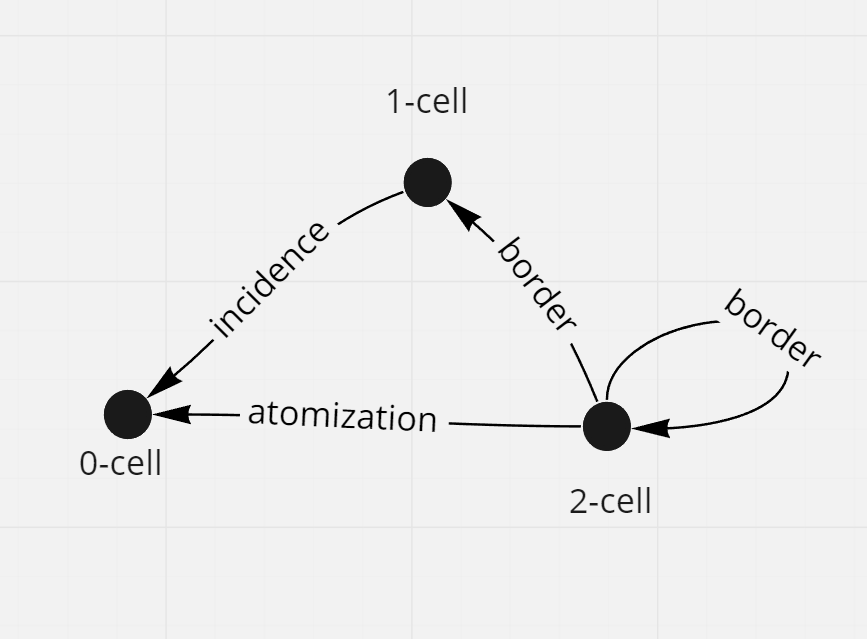